In [2]:
from mp1 import *
from model_mp1 import *
from plotter import *
import numpy as np
%matplotlib inline

# 3. Simple Classification

Creating data:
0
100
200
prediction of a disk with sgd optimizer:  [[1. 0. 0.]]
prediction of a disk with adam optimizer:  [[0. 1. 0.]]


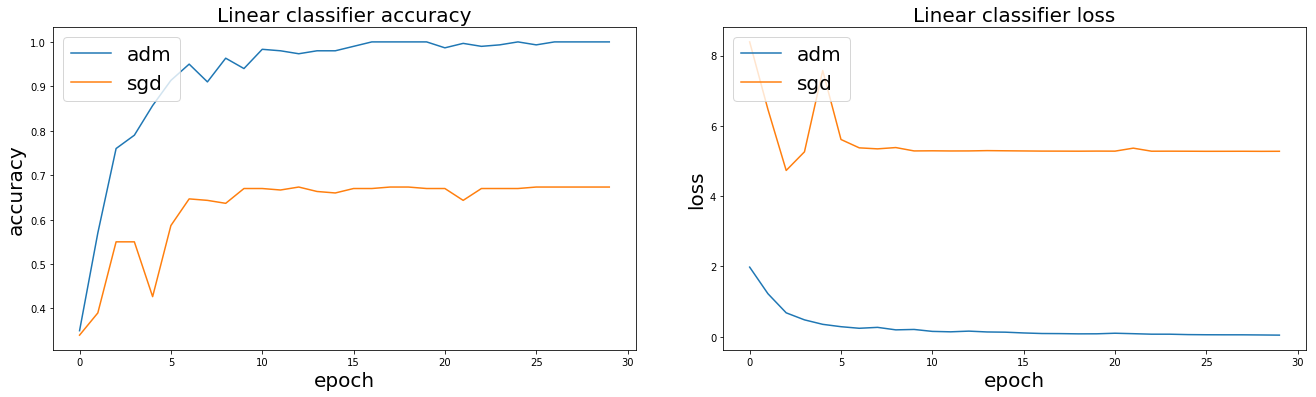

In [2]:
# generate dataset
[X_train, Y_train] = generate_dataset_classification(300, 20)
y_train = np_utils.to_categorical(Y_train, num_classes=3)

# dense layer model
model_sgd = DenseModel(optimizer='sgd')
history_sgd=model_sgd.fit(X_train, y_train,batch_size=32,epochs=30,verbose=0)

model_adam = DenseModel(optimizer='adam')
history_adam=model_adam.fit(X_train, y_train,batch_size=32,epochs=30,verbose=0)

#evaluation
np.random.seed()
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
print('prediction of a disk with sgd optimizer: ',model_sgd.predict(X_test))
print('prediction of a disk with adam optimizer: ',model_adam.predict(X_test))

# plot the evolution of accuracy and loss
plot_acc_loss(his1=history_adam,his2=history_sgd,legend1='adm',legend2='sgd',
              title1='Linear classifier accuracy',title2='Linear classifier loss')

# 4. Visualization of the solution

<Figure size 432x288 with 0 Axes>

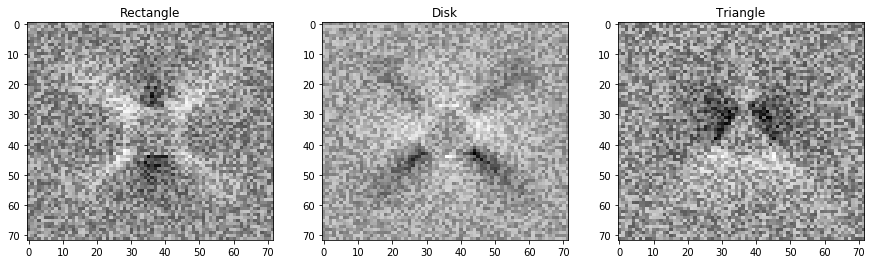

In [3]:
solution=model_adam.get_weights()[0]
visual_solution(solution)

# 5. A More Diﬃcult Classiﬁcation Problem

In [2]:
# generate dataset
[X_train, Y_train] = generate_dataset_classification(1000, 20, True)
[X_test, Y_test] = generate_test_set_classification()
x_train=X_train.reshape(-1,1,72,72)
y_train = np_utils.to_categorical(Y_train, num_classes=3)
x_test=X_test.reshape(-1,1,72,72)
y_test = np_utils.to_categorical(Y_test, num_classes=3)

# Model
model_CNN = CNN_ClassModel(input_shape=(1, 72, 72),n_class=3)
history_CNN=model_CNN.fit(x_train, y_train, epochs=30,validation_data=(x_test, Y_test))

# evaluation result
[X_test, Y_test] = generate_test_set_classification()
x_test=X_test.reshape(-1,1,72,72)
loss,accuracy=model2.evaluate(x_test, Y_test)
print("loss:",loss, "accuracy:",accuracy)

plot_trainval(his=history_CNN)

Creating data:
0
100
200
300
400
500
600
700
800
900
Creating data:
0
100
200


/Users/zhangyuan/Documents/Workspace/MVA_Project/DL/mp1/model_mp1.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), input_shape=(1, 72, 72..., data_format="channels_first", filters=16, padding="same")`
  input_shape=input_shape))


Train on 1000 samples, validate on 300 samples
Epoch 1/30
 640/1000 [==================>...........] - ETA: 12s - loss: 1.2122 - acc: 0.3844

KeyboardInterrupt: 

# 6. A Regression Problem

In [3]:
def normalize_perim_1(y):
    #print(y)
    U=y[[0,2,4]]
    V=y[[1,3,5]]
    order=np.argsort(V)
    U_sort=U[order]
    V_sort=V[order]
    return [U_sort[0], V_sort[0], U_sort[1], V_sort[1], U_sort[2], V_sort[2]]

[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()
x_train=X_train.reshape(-1,1,72,72)
x_test=X_test.reshape(-1,1,72,72)

y_train=np.apply_along_axis(normalize_perim_1, 1, Y_train)
y_test=np.apply_along_axis(normalize_perim_1, 1, Y_test)

model_regCNN, callbacks_list = CNN_RegModel(input_shape=(1,72,72),output_dim=6,model_path='model.h5')

Creating data:
0
100
200
Creating data:
0
100
200


/Users/zhangyuan/Documents/Workspace/MVA_Project/DL/mp1/model_mp1.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(1, 72, 72..., padding="same", data_format="channels_first", filters=16, kernel_size=(5, 5))`
  model.add(Convolution2D(filters=16,nb_row=5,nb_col=5, padding='same',data_format='channels_first',input_shape=input_shape))
/Users/zhangyuan/Documents/Workspace/MVA_Project/DL/mp1/model_mp1.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(data_format="channels_first", padding="same", kernel_size=(5, 5), filters=16)`
  model.add(Convolution2D(filters=16,nb_row=5,nb_col=5, padding='same',data_format='channels_first'))


NameError: name 'model' is not defined

In [4]:
history=model_regCNN.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test),callbacks=callbacks_list)

Train on 300 samples, validate on 300 samples
Epoch 1/20
300/300 [==============================] - 73s 242ms/step - loss: 0.1506 - acc: 0.1633 - val_loss: 0.0727 - val_acc: 0.5067

Epoch 00001: loss improved from inf to 0.15056, saving model to model.h5
Epoch 2/20
288/300 [===========================>..] - ETA: 2s - loss: 0.0725 - acc: 0.4306

KeyboardInterrupt: 